# MODELIZACIÓN PARA NO SUPERVISADO

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

**IMPORTANTE**: Esta plantilla está diseñada para una visión de máximos utilizando el framework de The Ultimate Algo Machine. Si tienes problemas de memoria o rendimiento recuerda reducir el problema mediante:

* Muestreo
* Balanceo undersampling
* Reducir el número de k a testar
* Reducir el número de repeticiones de n_init

## IMPORTAR PAQUETES

In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import GridSearchCV

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [295]:
ruta_proyecto = 'C:/Users/USER/Desktop/DSD4B (ZERO TO HERO)/03_MACHINE_LEARNING/08_CASOS/01_LEADSCORING'

Nombres de los ficheros de datos.

In [296]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [297]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3645 entries, 660737 to 579622
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   origen_API                                   3645 non-null   float64
 1   origen_Landing Page Submission               3645 non-null   float64
 2   origen_Lead Add Form                         3645 non-null   float64
 3   origen_Otros                                 3645 non-null   float64
 4   fuente_Chat                                  3645 non-null   float64
 5   fuente_Direct Traffic                        3645 non-null   float64
 6   fuente_Google                                3645 non-null   float64
 7   fuente_Organic Search                        3645 non-null   float64
 8   fuente_Otros                                 3645 non-null   float64
 9   fuente_Reference                             3645 non-null   float64
 10

In [299]:
df.drop(columns=['fuente_Chat',
                'fuente_Direct Traffic',
                'fuente_Google',
                'fuente_Otros',
                'fuente_Organic Search',
                'score_actividad_mms',
                'score_perfil_mms',
                'descarga_lm_No',
                'descarga_lm_Yes',
                'visitas_total_mms',
                'paginas_vistas_visita_mms',
                'ambito_Aerolineas',
                'ambito_Agentes de Carga',
                'ambito_Exportadores',
                'ambito_Importadores',
                'ambito_Null',
                'ambito_Otros'
                ],inplace= True)

## MODELIZAR

### Crear el espacio de soluciones

In [300]:
min_k = 3
max_k = 7

soluciones = list(range(min_k,max_k))

### Crear listas para guardar la salida de cada métrica

In [301]:
codo = []
silueta = []
calins = []
davies = []

### Analizar el espacio de soluciones

In [302]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

### Identificar la mejor solucion

#### Analizar las métricas

In [303]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
3,4107.79,0.29,1030.72,1.50
4,3634.33,0.31,934.56,1.42
5,3259.79,0.34,885.79,1.43
6,2919.13,0.35,876.05,1.39


#### Analizar los gráficos

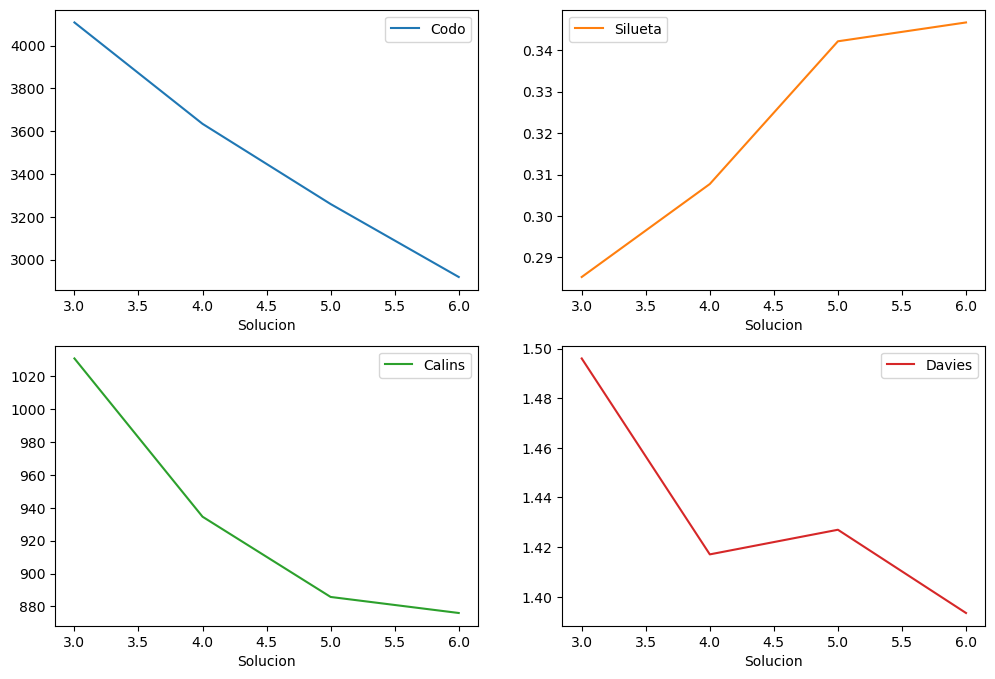

In [304]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);
plt.show()

### Segmentación final con la mejor solucion

In [305]:
mejor_solucion = 6

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(df)

KMeans(n_clusters=6, n_init=10)

## EVALUAR

Comprobar que los perfiles obtenidos en entrenamiento son similares a los objetidos al predecir sobre validación.

### Calcular el segmento en entrenamiento y en validación

In [306]:
df['segmento'] = cluster.predict(df)

### Comparar los perfiles

## PERFILAR LOS SEGMENTOS

In [307]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3,4,5
origen_API,0.000000,0.787419,0.000000,0.000000,1.000000,0.192182
origen_Landing Page Submission,0.972603,0.000000,0.984507,0.986214,0.000000,0.605863
origen_Lead Add Form,0.015656,0.199566,0.005634,0.007423,0.000000,0.198697
origen_Otros,0.011742,0.013015,0.009859,0.006363,0.000000,0.003257
fuente_Reference,0.013699,0.182213,0.004225,0.004242,0.000000,0.195440
ult_actividad_Chat Conversation,0.074364,0.056399,0.000000,0.000000,0.179523,0.026059
ult_actividad_Converted to Lead,0.281800,0.013015,0.000000,0.000000,0.112202,0.032573
ult_actividad_Email Link Clicked,0.119374,0.017354,0.000000,0.000000,0.046283,0.022801
ult_actividad_Email Opened,0.000000,0.362256,0.000000,1.000000,0.381487,0.384365
ult_actividad_Otros,0.183953,0.093275,0.000000,0.000000,0.037868,0.087948


In [308]:
df.segmento.value_counts(normalize=True)

segmento
3   0.26
4   0.20
2   0.19
0   0.14
1   0.13
5   0.08
Name: proportion, dtype: float64